
### Pandas in Algorithmic Trading

**Pandas** is a powerful data manipulation and analysis library for Python. 
- It provides data structures like Series and DataFrame, 
- which are essential for handling and analyzing time series data, such as stock prices, in algorithmic trading.

#### Key Features of Pandas

1. **Data Structures**: Provides Series (1D) and DataFrame (2D) for structured data.
2. **Time Series Analysis**: In-built support for handling and manipulating time series data.
3. **Data Cleaning**: Tools for handling missing data, filtering, and aggregating data.
4. **Data Alignment**: Automatically aligns data based on labels, making operations intuitive.
5. **Integration**: Easily integrates with other libraries like NumPy, Matplotlib, and SciPy.
6. **IO Tools**: Functions for reading and writing data from various formats (CSV, Excel, SQL, etc.).

#### Use Cases in Algorithmic Trading

1. **Loading and Cleaning Data**: Importing historical price data from CSV, cleaning missing values, and normalizing data.
2. **Time Series Analysis**: Calculating moving averages, returns, and other indicators.
3. **Data Aggregation**: Grouping data by time intervals (e.g., daily, weekly) to perform aggregate calculations.
4. **Feature Engineering**: Creating new features for machine learning models, such as technical indicators.
5. **Backtesting**: Simulating trading strategies on historical data to evaluate performance.
6. **Visualization**: Plotting price trends, indicators, and performance metrics using integrated plotting functions.

### Comparison: Pandas vs. NumPy

| Feature/Aspect          | Pandas                                    | NumPy                                      |
|-------------------------|-------------------------------------------|--------------------------------------------|
| **Primary Data Structures** | Series (1D), DataFrame (2D)              | ndarray (n-dimensional array)               |
| **Use Case Focus**      | Data manipulation and analysis            | Numerical computation and operations       |
| **Time Series Handling**| Excellent support for time series         | Basic support (requires additional libraries)| 
| **Data Cleaning**       | Built-in functions for handling missing data | Requires custom handling                    |
| **Data Alignment**      | Automatic alignment based on labels       | No alignment, purely positional             |
| **Data Types**          | Can handle heterogeneous data types       | Homogeneous data types only                 |
| **Performance**         | Slower due to additional features         | Faster for numerical operations             |
| **Aggregation & Grouping**| Robust groupby and aggregation methods    | Limited grouping capabilities               |
| **Integration**         | Integrates well with other data tools     | Often serves as the computational backbone  |
| **Visualization**       | Integrated plotting (via Matplotlib)      | Requires external plotting libraries        |
| **Memory Efficiency**   | Higher memory usage due to metadata       | More memory-efficient for raw numerical data|

### Example in Algorithmic Trading

#### Using Pandas

```python
import pandas as pd

# Load historical price data from CSV
data = pd.read_csv('historical_prices.csv', parse_dates=['Date'], index_col='Date')

# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Plot closing prices and moving averages
data[['Close', 'MA50', 'MA200']].plot()
```

#### Using NumPy

```python
import numpy as np

# Assume `prices` is a NumPy array of closing prices
prices = np.array([100, 101, 102, 103, 104])

# Calculate moving averages using NumPy
MA50 = np.convolve(prices, np.ones(50)/50, mode='valid')
MA200 = np.convolve(prices, np.ones(200)/200, mode='valid')

# Calculate daily returns
daily_returns = np.diff(prices) / prices[:-1]
```

### Summary

- **Pandas**: Ideal for data manipulation, time series analysis, and handling heterogeneous data. It's especially useful in algorithmic trading for loading, cleaning, and analyzing large datasets of historical price data. Pandas is slower but offers a wide range of high-level data manipulation tools.
- **NumPy**: Best for efficient numerical computations with homogeneous data. It is faster and more memory-efficient but requires more manual handling for data manipulation tasks.

In algorithmic trading, both libraries are often used together: NumPy for efficient numerical operations and Pandas for data manipulation and analysis tasks.

### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('coin_Bitcoin.csv')

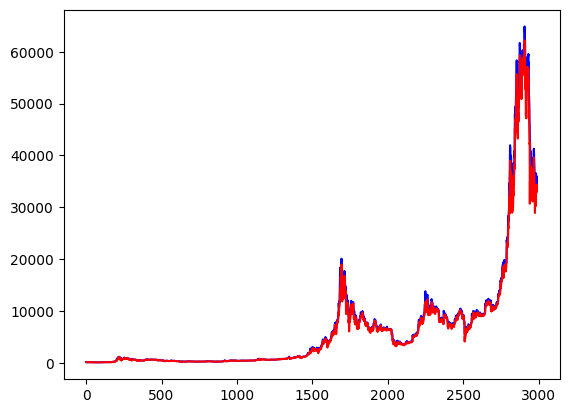

In [3]:
plt.plot(df['High'], label='High', color='blue')
plt.plot(df['Low'], label='Low', color='red')

### Series from lists

In [ ]:
# string
list_str = ["Apple","Microsoft","Bitcoin",'Ethereum']
pd.Series(list_str)


In [ ]:
# integers

list_int = [100,101,102,103]
pd.Series(list_int)


In [ ]:
# custom index
list_str = ["Apple","Microsoft","Bitcoin",'Ethereum']
list_int = [100,101,102,103]
ser_cust  = pd.Series(list_int,index=list_str)
(ser_cust)

In [ ]:
ser_cust[0]

In [ ]:
# setting a name


list_str = ["Apple","Microsoft","Bitcoin",'Ethereum']
list_int = [100,101,102,103]
pd.Series(list_int,index=list_str,name="The Stock Prices of Kuldeep")

### Series from dict

In [ ]:
dict_str = {"Apple":100,"Microsoft":200,"Bitcoin":3000000,'Ethereum':400,'Etrhereum':400}
dict_ser = pd.Series(dict_str,name="The Stock Prices of Kuldeep")
dict_ser

### Series Attributes

In [ ]:
# size
dict_ser.size

In [ ]:
# dtype
dict_ser.dtype

In [ ]:
# name
dict_ser.name

In [ ]:
# is_unique
dict_ser.is_unique

In [ ]:
# index
(dict_ser.index)

In [ ]:
# values
(dict_ser.values)

### Series using read_csv

In [4]:
# with one col

import requests
import pandas as pd

# Define the API endpoint
url = "https://api.coingecko.com/api/v3/coins/markets"

# Define the parameters for the API request
params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False
}

# Make the API request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Create a DataFrame from the data
    df = pd.DataFrame(data)
    
    # Display the DataFrame
    print(df.head())
else:
    print(f"Failed to fetch data: {response.status_code}")


            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3  binancecoin    bnb       BNB   
4       solana    sol    Solana   

                                               image  current_price  \
0  https://coin-images.coingecko.com/coins/images...   64770.000000   
1  https://coin-images.coingecko.com/coins/images...    3517.770000   
2  https://coin-images.coingecko.com/coins/images...       0.999553   
3  https://coin-images.coingecko.com/coins/images...     596.020000   
4  https://coin-images.coingecko.com/coins/images...     134.330000   

      market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  1280196047190                1             1.363660e+12  2.263356e+10   
1   430389441518                2             4.303894e+11  1.594333e+10   
2   112594133745                3             1.125941e+11  3.997854e+10   
3    91721527076                4             9.172153e+10

In [3]:
df.to_csv("/Users/fraqetrade/GitHub/100-Days-G-Branch/100-Days-Of-Hell-With-Python-Algotrading/Day_24_Pandas-In-Python copy/Day_23_Algotrading.csv",index=False)

In [4]:
df = pd.read_csv("/Users/fraqetrade/GitHub/100-Days-G-Branch/100-Days-Of-Hell-With-Python-Algotrading/Day_24_Pandas-In-Python copy/Day_23_Algotrading.csv")

In [ ]:
#df = ((df[["name","current_price"]]))
#df = df.set_index("name")
df

In [ ]:
ser = df.squeeze()

In [ ]:
aser = ser.astype(np.int8)

In [ ]:
import sys
print(sys.getsizeof(aser))

In [ ]:
# with 2 cols


ser = df.squeeze()
type(ser)

In [ ]:
ser

### Series methods

In [ ]:
# head & tail 

df.head(20)

In [ ]:
# sample
df.sample(5)


In [ ]:
# value_counts -> prices
df.value_counts(ascending=True)
df

In [ ]:
# sort_values -> inplace
df.sort_values(ascending=False)

In [ ]:
# sort_index -> inplace -> movies

df.sort_index(ascending=False)

### Series Maths Methods

In [ ]:
import numpy as np
# count

math_Ser = pd.Series([1,2,3,np.nan,4,5])
print(math_Ser.count())
print(math_Ser.size)

In [ ]:
# sum -> product
df.product()

In [ ]:
# mean -> median -> mode -> std -> var
df.var()

In [ ]:
# min/max
df.max()

In [ ]:
# describe
df.describe()

### Series Indexing

In [ ]:
# integer indexing
list_int = [100,101,102,103]
int_ser  = pd.Series(list_int)
int_ser

In [ ]:
int_ser[2]

In [ ]:
# negative indexing
df[-1]

In [ ]:
# slicing
print(int_ser[1:3])
print(df["BitTorrent":"Shiba Inu"])

In [189]:
df

name
BitTorrent               1.000000
Pepe                     2.000000
Shiba Inu                0.000022
Bonk                     0.000026
FLOKI                    0.000214
Zebec Protocol           0.018961
Notcoin                  0.019491
Beam                     0.020878
Flare                    0.027377
VeChain                  0.029574
GALA                     0.034787
JasmyCoin                0.035934
Hedera                   0.089644
Stellar                  0.098062
Cronos                   0.101956
TRON                     0.115847
Chiliz                   0.117766
Dogecoin                 0.142438
Brett                    0.144714
Algorand             10001.000000
Kaspa                    0.167656
The Graph                0.248493
Pyth Network             0.376772
The Sandbox              0.395701
Cardano                  0.422733
Sei                      0.444675
XRP                      0.477722
Polygon                  0.608912
Fantom                   0.644750
EOS      

In [ ]:
# negative slicing
int_ser[-3:-1]

In [ ]:
# fancy indexing
int_ser[[0,2]]

In [ ]:
# indexing with labels -> fancy indexing
df[["BitTorrent","Pepe","Bonk"]]

### Editing Series

In [ ]:
# using indexing
int_ser[2] = 122
int_ser

In [ ]:
# what if an index does not exist
int_ser[4] = 122
int_ser

In [ ]:
# slicing
int_ser[[1,4]] = [1000,1222]
int_ser

In [ ]:
# fancy indexing
df[["BitTorrent","Pepe"]] = [1,2]
df

In [ ]:
# using index label
df["Algorand"] = 10001
df["Algorand"]

### Series with Python Functionalities

In [162]:
# len/type/dir/sorted/max/min
print(len(df))
print(len(int_ser))

df.count() # Method Series class
df.size   # Attriubute Series Class
df["Algorand"] #Series or Dataframe indexing
len(df) #Fuction 


50
5


In [164]:
# type conversion
type(int_ser)

pandas.core.series.Series

In [170]:
# membership operator
1.0 in df.values

True

In [172]:
# looping
for i in df.index:
    print(i)

BitTorrent
Pepe
Shiba Inu
Bonk
FLOKI
Zebec Protocol
Notcoin
Beam
Flare
VeChain
GALA
JasmyCoin
Hedera
Stellar
Cronos
TRON
Chiliz
Dogecoin
Brett
Algorand
Kaspa
The Graph
Pyth Network
The Sandbox
Cardano
Sei
XRP
Polygon
Fantom
EOS
Ethena
Flow
Mantle
Jupiter
Arbitrum
Sui
First Digital USD
Tether
USDC
Dai
Ethena USDe
Starknet
Bitget Token
Ondo
Core
Fetch.ai
dYdX
Theta Network
Immutable
Lido DAO


In [188]:
# Arithmetic Operators(Broadcasting)
df

name
BitTorrent               1.000000
Pepe                     2.000000
Shiba Inu                0.000022
Bonk                     0.000026
FLOKI                    0.000214
Zebec Protocol           0.018961
Notcoin                  0.019491
Beam                     0.020878
Flare                    0.027377
VeChain                  0.029574
GALA                     0.034787
JasmyCoin                0.035934
Hedera                   0.089644
Stellar                  0.098062
Cronos                   0.101956
TRON                     0.115847
Chiliz                   0.117766
Dogecoin                 0.142438
Brett                    0.144714
Algorand             10001.000000
Kaspa                    0.167656
The Graph                0.248493
Pyth Network             0.376772
The Sandbox              0.395701
Cardano                  0.422733
Sei                      0.444675
XRP                      0.477722
Polygon                  0.608912
Fantom                   0.644750
EOS      

In [179]:
# Relational Operators

df[df > 0.1]

name
BitTorrent               1.000000
Pepe                     2.000000
Cronos                   0.101956
TRON                     0.115847
Chiliz                   0.117766
Dogecoin                 0.142438
Brett                    0.144714
Algorand             10001.000000
Kaspa                    0.167656
The Graph                0.248493
Pyth Network             0.376772
The Sandbox              0.395701
Cardano                  0.422733
Sei                      0.444675
XRP                      0.477722
Polygon                  0.608912
Fantom                   0.644750
EOS                      0.681961
Ethena                   0.720688
Flow                     0.742369
Mantle                   0.894045
Jupiter                  0.913249
Arbitrum                 0.946625
Sui                      0.991253
First Digital USD        0.997030
Tether                   0.998899
USDC                     0.999620
Dai                      1.000000
Ethena USDe              1.000000
Starknet 

### Boolean Indexing on Series

In [183]:
# Find values which are greater than 0.1 but less than 0.4
df[(df > 0.1) & (df < 0.4)]

name
Cronos          0.101956
TRON            0.115847
Chiliz          0.117766
Dogecoin        0.142438
Brett           0.144714
Kaspa           0.167656
The Graph       0.248493
Pyth Network    0.376772
The Sandbox     0.395701
Name: current_price, dtype: float64

In [185]:
# find number of values 1
df[df == 1]

name
BitTorrent     1.0
Dai            1.0
Ethena USDe    1.0
Starknet       1.0
Name: current_price, dtype: float64

### Plotting Graphs on Series

<Axes: xlabel='name'>

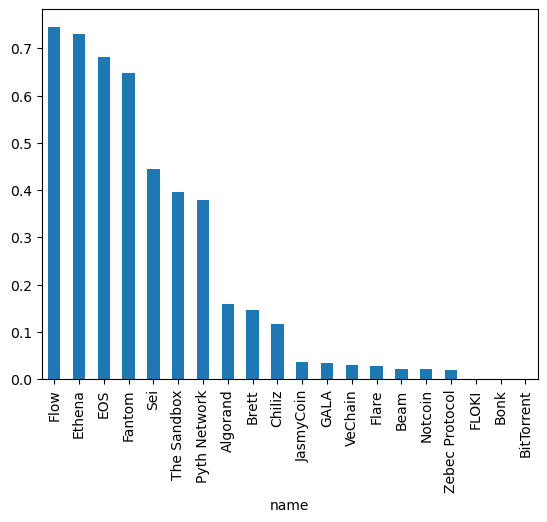

In [28]:
# df = df[["name","current_price"]]
# df.set_index("name",inplace=True)
# df = df.squeeze()
df = df.sort_values(ascending=False)
df = df.tail(20)
df.plot(kind="bar")

### Some Important Series Methods

In [36]:
# astype
# between
# clip
# drop_duplicates
# isnull
# dropna
# fillna
# isin
# apply
# copy
import sys
import numpy as np
print(sys.getsizeof(df.dtype))



96
1901


In [38]:
dff = (sys.getsizeof(df.astype(dtype=np.int16)))
sys.getsizeof(dff)

28

In [45]:
print(df[df.between(0.3,0.5)])

print(df[(df > 0.3) & (df < 0.5)])

name
Sei             0.445201
The Sandbox     0.396677
Pyth Network    0.379491
Name: current_price, dtype: float64
name
Sei             0.445201
The Sandbox     0.396677
Pyth Network    0.379491
Name: current_price, dtype: float64


In [49]:
dfdf = df.clip(0.4,0.7)

In [51]:
dfdf.drop_duplicates()

name
Flow           0.700000
EOS            0.682105
Fantom         0.648614
Sei            0.445201
The Sandbox    0.400000
Name: current_price, dtype: float64

In [57]:
int_ser = pd.Series([1,np.nan,3,np.nan,4,5,np.nan])

In [60]:
int_ser.isnull().sum()

3

In [61]:
int_ser.dropna()

0    1.0
2    3.0
4    4.0
5    5.0
dtype: float64

In [63]:
int_ser.fillna("Missing Values")

0               1.0
1    Missing Values
2               3.0
3    Missing Values
4               4.0
5               5.0
6    Missing Values
dtype: object

In [64]:
int_ser.fillna(int_ser.mean())

0    1.00
1    3.25
2    3.00
3    3.25
4    4.00
5    5.00
6    3.25
dtype: float64

In [77]:
df[df.isin([0.744800,0.117397])]


name
Flow      0.744800
Chiliz    0.117397
Name: current_price, dtype: float64

In [89]:
df

name
Flow              0.744800
Ethena            0.729866
EOS               0.682105
Fantom            0.648614
Sei               0.445201
The Sandbox       0.396677
Pyth Network      0.379491
Algorand          0.158419
Brett             0.145963
Chiliz            0.117397
JasmyCoin         0.035404
GALA              0.034898
VeChain           0.029708
Flare             0.027432
Beam              0.020892
Notcoin           0.020656
Zebec Protocol    0.018781
FLOKI             0.000214
Bonk              0.000026
BitTorrent        0.000001
Name: current_price, dtype: float64

In [97]:
df.apply(lambda x :round(x))

name
Flow              1
Ethena            1
EOS               1
Fantom            1
Sei               0
The Sandbox       0
Pyth Network      0
Algorand          0
Brett             0
Chiliz            0
JasmyCoin         0
GALA              0
VeChain           0
Flare             0
Beam              0
Notcoin           0
Zebec Protocol    0
FLOKI             0
Bonk              0
BitTorrent        0
Name: current_price, dtype: int64

In [111]:
df

name
Flow              100.000000
Ethena              0.729866
EOS                 0.682105
Fantom              0.648614
Sei                 0.445201
The Sandbox         0.396677
Pyth Network        0.379491
Algorand            0.158419
Brett               0.145963
Chiliz              0.117397
JasmyCoin           0.035404
GALA                0.034898
VeChain             0.029708
Flare               0.027432
Beam                0.020892
Notcoin             0.020656
Zebec Protocol      0.018781
FLOKI               0.000214
Bonk                0.000026
BitTorrent          0.000001
Name: current_price, dtype: float64

In [101]:
dff = df.head()
dff["Flow"] = 100
dff

name
Flow      100.000000
Ethena      0.729866
EOS         0.682105
Fantom      0.648614
Sei         0.445201
Name: current_price, dtype: float64

In [103]:
dfg = df.copy()

In [109]:
dfg["Ethena"] = 200

In [110]:
dfg

name
Flow              100.000000
Ethena            200.000000
EOS                 0.682105
Fantom              0.648614
Sei                 0.445201
The Sandbox         0.396677
Pyth Network        0.379491
Algorand            0.158419
Brett               0.145963
Chiliz              0.117397
JasmyCoin           0.035404
GALA                0.034898
VeChain             0.029708
Flare               0.027432
Beam                0.020892
Notcoin             0.020656
Zebec Protocol      0.018781
FLOKI               0.000214
Bonk                0.000026
BitTorrent          0.000001
Etherna           200.000000
Name: current_price, dtype: float64

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import requests
import pandas as pd

# Define the API endpoint
url = "https://api.coingecko.com/api/v3/coins/markets"

# Define the parameters for the API request
params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False
}

# Make the API request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Create a DataFrame from the data
    df = pd.DataFrame(data)
    
    # Display the DataFrame
    print(df.head())
else:
    print(f"Failed to fetch data: {response.status_code}")



In [ ]:
df.info()

In [ ]:
df.plot.hexbin(x='current_price', y='market_cap', gridsize=30, cmap='viridis')


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "Pandas is a powerful data analysis and manipulation library for Python. It is widely used for data science, data analysis, and machine learning."

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import plotly.express as px

# Sample data
df = px.data.gapminder().query("year == 2007")

fig = px.scatter(df, x='gdpPercap', y='lifeExp',
                 size='pop', color='continent',
                 hover_name='country', log_x=True, size_max=60)

fig.show()


In [ ]:
import folium
from folium.plugins import HeatMap

# Sample data
data = [
    [37.7749, -122.4194, 10],
    [34.0522, -118.2437, 20],
    [40.7128, -74.0060, 30]
]

# Create a map
m = folium.Map(location=[37.7749, -122.4194], zoom_start=5)

# Add a heatmap
HeatMap(data).add_to(m)

# Save the map to an HTML file
m.save('heatmap.html')


In [ ]:
pd.plotting.scatter_matrix(df[['current_price', 'market_cap', 'total_volume']], figsize=(12, 12), diagonal='kde')


In [ ]:
import seaborn as sns
crosstab = pd.crosstab(df['market_cap_rank'], df['price_change_percentage_24h'])
sns.heatmap(crosstab, cmap='coolwarm')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# Sample stock price data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Open': pd.Series(range(100)) + pd.Series(range(100)).apply(lambda x: x*0.5),
    'High': pd.Series(range(100)) + pd.Series(range(100)).apply(lambda x: x*0.75),
    'Low': pd.Series(range(100)) + pd.Series(range(100)).apply(lambda x: x*0.25),
    'Close': pd.Series(range(100)) + pd.Series(range(100)).apply(lambda x: x*0.5),
    'Volume': pd.Series(range(100)) * 1000
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Calculate moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Create the candlestick chart
mc = mpf.make_marketcolors(up='g', down='r', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)

add_plot = [
    mpf.make_addplot(df['MA20'], color='blue'),
    mpf.make_addplot(df['MA50'], color='orange')
]

mpf.plot(df, type='candle', style=s, addplot=add_plot, volume=True, title='Candlestick Chart with Moving Averages')


In [ ]:
import seaborn as sns
import numpy as np

# Sample stock price data for multiple stocks
data = {
    'Stock_A': np.random.normal(loc=100, scale=10, size=100),
    'Stock_B': np.random.normal(loc=200, scale=15, size=100),
    'Stock_C': np.random.normal(loc=150, scale=20, size=100),
    'Stock_D': np.random.normal(loc=50, scale=5, size=100)
}

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Stock Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate sample stock price data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
data = {
    'Date': dates,
    'Open': np.random.uniform(low=100, high=200, size=len(dates)),
    'High': np.random.uniform(low=100, high=200, size=len(dates)),
    'Low': np.random.uniform(low=100, high=200, size=len(dates)),
    'Close': np.random.uniform(low=100, high=200, size=len(dates)),
    'Volume': np.random.uniform(low=1000, high=10000, size=len(dates))
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Calculate Bollinger Bands
df['MA20'] = df['Close'].rolling(window=20).mean()
df['20 Day STD'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['MA20'] + (df['20 Day STD'] * 2)
df['Lower Band'] = df['MA20'] - (df['20 Day STD'] * 2)

# Plot Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['MA20'], label='20-Day Moving Average', color='blue')
plt.plot(df['Upper Band'], label='Upper Bollinger Band', color='orange')
plt.plot(df['Lower Band'], label='Lower Bollinger Band', color='orange')
plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='orange', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()
plt.show()


In [ ]:
# Calculate RSI
delta = df['Close'].diff(1)
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import yfinance as yf

# Fetch stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2023-01-01', end='2023-04-10')

# Reset index to ensure 'Date' is a column
df.reset_index(inplace=True)

# Create the interactive candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])

fig.update_layout(title='Interactive Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()


[*********************100%%**********************]  1 of 1 completed


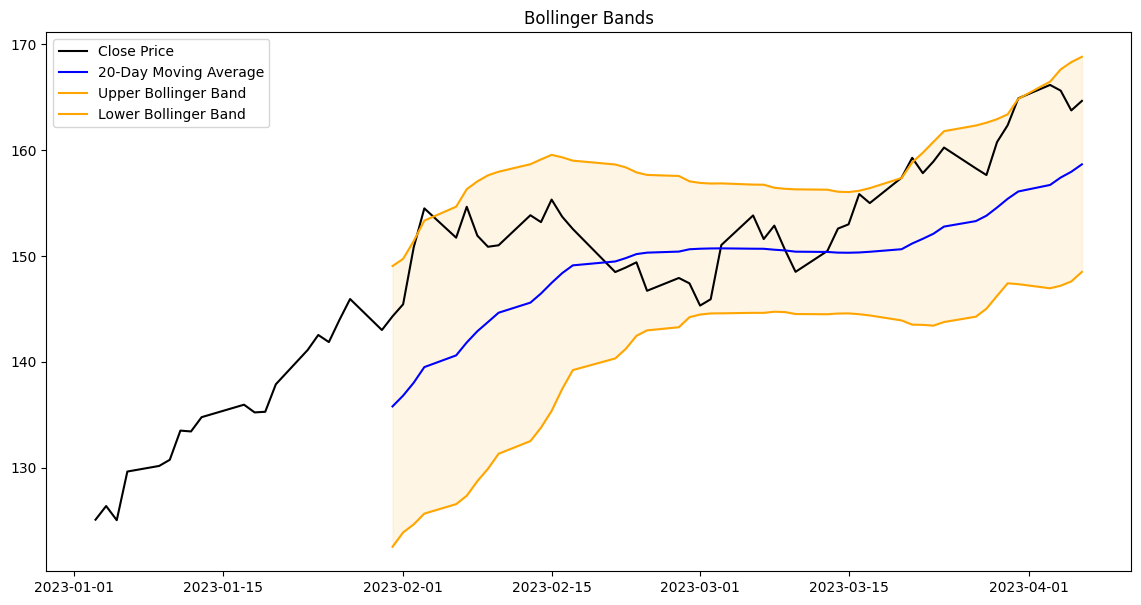

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Fetch stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2023-01-01', end='2023-04-10')

# Calculate Bollinger Bands
df['MA20'] = df['Close'].rolling(window=20).mean()
df['20 Day STD'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['MA20'] + (df['20 Day STD'] * 2)
df['Lower Band'] = df['MA20'] - (df['20 Day STD'] * 2)

# Plot Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['MA20'], label='20-Day Moving Average', color='blue')
plt.plot(df['Upper Band'], label='Upper Bollinger Band', color='orange')
plt.plot(df['Lower Band'], label='Lower Bollinger Band', color='orange')
plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='orange', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

# Fetch stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2023-01-01', end='2023-04-10')

# Calculate moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Create the candlestick chart with moving averages
add_plot = [
    mpf.make_addplot(df['MA20'], color='blue'),
    mpf.make_addplot(df['MA50'], color='orange')
]

apdict = mpf.make_addplot(df['Volume'], panel=1, color='lightgray', secondary_y=False)

mpf.plot(df, type='candle', addplot=add_plot + [apdict], volume=True, title='Apple Inc. (AAPL) with Moving Averages and Volume', style='yahoo')


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import yfinance as yf

# Fetch stock data for multiple tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
df = yf.download(tickers, start='2023-01-01', end='2023-04-10')['Adj Close']

# Calculate daily returns
returns = df.pct_change().dropna()

# Calculate correlation matrix
correlation_matrix = returns.corr()

# Create an interactive heatmap
fig = px.imshow(correlation_matrix, text_auto=True, aspect='auto', color_continuous_scale='Viridis')
fig.update_layout(title='Correlation of Stock Returns', xaxis_title='Stocks', yaxis_title='Stocks')
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

# Fetch stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2023-01-01', end='2023-04-10')

# Calculate Bollinger Bands
df['MA20'] = df['Close'].rolling(window=20).mean()
df['20 Day STD'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['MA20'] + (df['20 Day STD'] * 2)
df['Lower Band'] = df['MA20'] - (df['20 Day STD'] * 2)

# Calculate RSI
delta = df['Close'].diff(1)
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Plot Bollinger Bands and RSI
add_plot = [
    mpf.make_addplot(df['Upper Band'], color='orange'),
    mpf.make_addplot(df['Lower Band'], color='orange'),
    mpf.make_addplot(df['MA20'], color='blue'),
    mpf.make_addplot(df['RSI'], panel=1, color='purple', ylabel='RSI')
]

mpf.plot(df, type='candle', addplot=add_plot, volume=True, title='Apple Inc. (AAPL) with Bollinger Bands and RSI', style='charles')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2023-01-01', end='2023-04-10')

# Plot closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='black')

# Annotate significant events
events = {
    '2023-02-01': 'Earnings Report',
    '2023-03-15': 'Product Launch',
    '2023-04-01': 'Stock Split'
}

# Convert event dates to datetime objects
event_dates = pd.to_datetime(list(events.keys()))

# Annotate only if the date exists in the DataFrame
for date, event in zip(event_dates, events.values()):
    if date in df.index:
        plt.annotate(event, xy=(date, df.loc[date, 'Close']), xytext=(date, df.loc[date, 'Close']+5),
                     arrowprops=dict(facecolor='red', shrink=0.05),
                     horizontalalignment='left', verticalalignment='top')

plt.title('Apple Inc. (AAPL) Price Movements with Annotations')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib.dates import DateFormatter

# Fetch stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2023-01-01', end='2023-04-10')

# Check available styles
print(plt.style.available)

# Plot closing price with a professional style
plt.style.use('ggplot')  # Using a valid matplotlib style
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df['Close'], label='Close Price', color='black')

# Annotate significant events
events = {
    '2023-02-01': 'Earnings Report',
    '2023-03-15': 'Product Launch',
    '2023-04-01': 'Stock Split'
}

# Convert event dates to datetime objects
event_dates = pd.to_datetime(list(events.keys()))

# Annotate only if the date exists in the DataFrame
for date, event in zip(event_dates, events.values()):
    if date in df.index:
        ax.annotate(event, xy=(date, df.loc[date, 'Close']), xytext=(date, df.loc[date, 'Close']+5),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    horizontalalignment='left', verticalalignment='top')

# Format the x-axis for better readability
date_form = DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)
fig.autofmt_xdate()

plt.title('Apple Inc. (AAPL) Price Movements with Annotations')
plt.legend()
plt.show()


In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import yfinance as yf

# Fetch stock data for multiple tickers
tickers = ['AAPL', 'MSFT', 'GOOGL']
df = yf.download(tickers, start='2023-01-01', end='2023-04-10')['Adj Close']

# Prepare data for 3D surface plot
dates = df.index
stock_data = [df[ticker].values for ticker in tickers]

# Create the 3D surface plot
fig = go.Figure()

for i, ticker in enumerate(tickers):
    fig.add_trace(go.Surface(z=[stock_data[i]], x=dates, y=[ticker] * len(dates), name=ticker))

fig.update_layout(title='3D Surface Plot of Stock Prices', scene=dict(
                    xaxis_title='Date',
                    yaxis_title='Stock',
                    zaxis_title='Price'),
                  autosize=False, width=800, height=800)
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [ ]:
import pandas as pd
import plotly.express as px
import yfinance as yf

# Fetch stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2023-01-01', end='2023-04-10')

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df, x=df.index, y='Close', z='Volume', color='Close', size='Volume',
                    title='3D Scatter Plot of Stock Prices and Volume', labels={'Close': 'Close Price', 'Volume': 'Volume', 'index': 'Date'})

fig.update_layout(scene=dict(xaxis_title='Date', yaxis_title='Close Price', zaxis_title='Volume'))
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import yfinance as yf

# Fetch stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2023-01-01', end='2023-04-10')

# Create a 3D candlestick chart with volume bars
fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='Candlestick')])

fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume', marker=dict(color='rgba(50, 171, 96, 0.6)'), yaxis='y2'))

fig.update_layout(title='3D Candlestick Chart with Volume Bars', yaxis=dict(title='Price'), yaxis2=dict(title='Volume', overlaying='y', side='right'))

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import yfinance as yf

# Fetch stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2023-01-01', end='2023-04-10')

# Calculate moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Create a 3D line plot for moving averages
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=df.index, y=df['MA20'], z=df['Close'], mode='lines', name='MA20', line=dict(color='blue')))
fig.add_trace(go.Scatter3d(x=df.index, y=df['MA50'], z=df['Close'], mode='lines', name='MA50', line=dict(color='orange')))
fig.add_trace(go.Scatter3d(x=df.index, y=df['Close'], z=df['Volume'], mode='lines', name='Close Price', line=dict(color='green')))

fig.update_layout(title='3D Line Plot for Moving Averages', scene=dict(xaxis_title='Date', yaxis_title='Moving Average', zaxis_title='Close Price'))
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
import yfinance as yf

# Fetch stock data
tickers = ['AAPL', 'MSFT', 'GOOGL']
df = yf.download(tickers, start='2023-01-01', end='2023-04-10')['Adj Close']

# Calculate market cap for visualization (using arbitrary values for example)
market_cap = {
    'AAPL': 2.5e12,
    'MSFT': 2.0e12,
    'GOOGL': 1.5e12
}

# Prepare data for 3D bubble chart
df = df.reset_index()
df_melted = df.melt(id_vars='Date', var_name='Stock', value_name='Price')
df_melted['Volume'] = df_melted['Price'] * 1000  # Example volume data
df_melted['Market Cap'] = df_melted['Stock'].map(market_cap)

# Create an interactive 3D bubble chart
fig = px.scatter_3d(df_melted, x='Date', y='Price', z='Volume', color='Stock', size='Market Cap',
                    title='3D Bubble Chart for Stock Data', labels={'Price': 'Price', 'Volume': 'Volume', 'Date': 'Date'})

fig.update_layout(scene=dict(xaxis_title='Date', yaxis_title='Price', zaxis_title='Volume'))
fig.show()


In [ ]:
# astype


In [ ]:
# between


In [ ]:
# clip


In [ ]:
# drop_duplicates


In [ ]:
# isnull


In [ ]:
# dropna


In [ ]:
# fillna


In [ ]:
# isin


In [ ]:
# apply


In [ ]:
# copy